# ⚡ Keras – Classificação de Roupas (Fashion MNIST)
Google Colab Ready

In [24]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.19.0


## 📦 Carregando o Dataset Fashion MNIST

In [25]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(f"Formato dos dados de treino: {x_train.shape}")
print(f"Formato dos labels de treino: {y_train.shape}")
print(f"Formato dos dados de teste: {x_test.shape}")
print(f"Formato dos labels de teste: {y_test.shape}")


Formato dos dados de treino: (60000, 28, 28)
Formato dos labels de treino: (60000,)
Formato dos dados de teste: (10000, 28, 28)
Formato dos labels de teste: (10000,)


## 🖼️ Visualizando Algumas Imagens

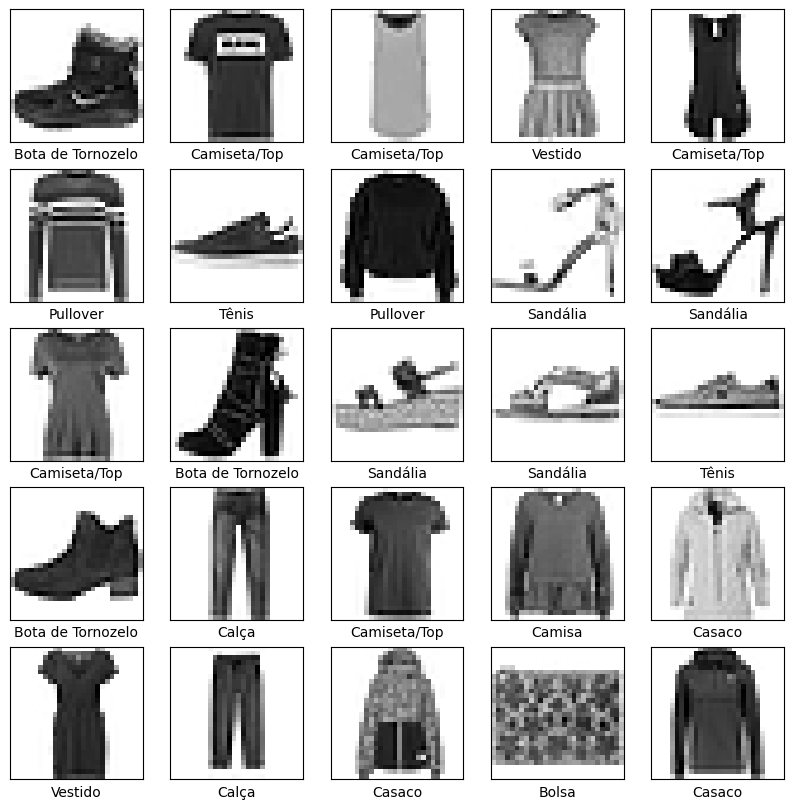

In [26]:

nomes_classes = ['Camiseta/Top', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota de Tornozelo']

# O dataset Fashion MNIST já vem com uma convenção fixa de rótulos:
# Número (y)	Classe
# 0	Camiseta / Top
# 1	Calça
# 2	Pullover
# 3	Vestido
# 4	Casaco
# 5	Sandália
# 6	Camisa
# 7	Tênis
# 8	Bolsa
# 9	Bota de Tornozelo

plt.figure(figsize=(10, 10)) # tamanho da imagem
for i in range(25): # vamos criar 25 imagens
    plt.subplot(5, 5, i + 1) # 5 linhas e 5 colunas
    plt.xticks([]) # remove números do eixo x
    plt.yticks([]) # remove números do eixo y
    plt.imshow(x_train[i], cmap=plt.cm.binary) # mostra a imagem
    plt.xlabel(nomes_classes[y_train[i]]) # bota um rótulo na imagem
plt.show() # mostra


## 🔧 Pré-processamento

In [27]:
# No Fashion MNIST, cada pixel é um número inteiro:
# 0 → preto
# 255 → branco
# valores entre isso → tons de cinza

x_train = x_train / 255.0 # normaliza, deixa todos os pixels entre 0.0 e 1.0 - treinamento mais rápido e estável
x_test = x_test / 255.0 # normaliza, deixa todos os pixels entre 0.0 e 1.0 - treinamento mais rápido e estável

print(f"Mínimo: {x_train.min()}, Máximo: {x_train.max()}")


Mínimo: 0.0, Máximo: 1.0


## 🧱 Construindo o Modelo

In [28]:
# ============================================
# CONSTRUINDO NOSSA REDE NEURAL
# ============================================

# Sequential = Modelo em SEQUÊNCIA (como uma linha de montagem)
# Os dados entram na primeira camada e saem na última, sem desvios
modelo = tf.keras.Sequential([

    # -----------------------------------------
    # CAMADA 1: Flatten (Achatamento)
    # -----------------------------------------
    # PROBLEMA: A imagem chega como uma MATRIZ 28x28
    # SOLUÇÃO: Transformar em um VETOR de 784 números
    # POR QUÊ? As próximas camadas esperam números em linha, não em grade
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Visual: ▢▢▢  →  ▢ ▢ ▢ ▢ ▢ ▢
    #          ▢▢▢      ▢ ▢ ▢ ▢ ▢ ▢
    #          ▢▢▢      ▢ ▢ ▢ ▢ ▢ ▢

    # -----------------------------------------
    # CAMADA 2: Dense 128 (Inteligência)
    # -----------------------------------------
    # "Dense" = Totalmente conectada (cada neurônio conversa com todos da camada anterior)
    # 128 neurônios = 128 "especialistas" analisando a imagem
    # Cada neurônio: "Eu procuro por GOLAS" ou "Eu procuro por MANGAS"
    # ReLU = Ativação que "liga" apenas se encontrar algo interessante
    #        Se entrada > 0 → passa adiante | Se entrada ≤ 0 → bloqueia (zera)
    tf.keras.layers.Dense(128, activation='relu'),
    # Analogia: 128 detetives examinando a mesma cena do crime

    # -----------------------------------------
    # CAMADA 3: Dense 10 (Decisão Final)
    # -----------------------------------------
    # 10 neurônios = Um para cada tipo de roupa
    # Softmax = Transforma em PROBABILIDADES (soma = 100%)
    # Resultado: [0.02, 0.85, 0.01, 0.03, 0.02, 0.01, 0.01, 0.02, 0.01, 0.02]
    #            ↑       ↑ ← 85% de chance de ser CALÇA
    #           Camiseta Calça ...
    tf.keras.layers.Dense(10, activation='softmax')
    # Analogia: 10 jurados votando, softmax garante que os votos somem 100%
])

# ============================================
# RESUMO DO MODELO (para entender a complexidade)
# ============================================
print("🧠 RESUMO DA ARQUITETURA:")
print("=" * 50)
modelo.summary()

print("\n📊 DETALHES DOS PARÂMETROS:")
print("=" * 50)
print("CAMADA Flatten:")
print("  • Não tem parâmetros para aprender")
print("  • Apenas reorganiza: 28x28 → 784")
print()

print("CAMADA Dense (128 neurônios):")
print("  • Cada um dos 784 pixels conecta aos 128 neurônios")
print("  • Cálculo: 784 entradas × 128 neurônios = 100.352 conexões")
print("  • +128 bias (um por neurônio) = 100.480 parâmetros")
print("  • O que aprendem: Bordas, texturas, padrões básicos")
print()

print("CAMADA Dense (10 neurônios - saída):")
print("  • Cada um dos 128 neurônios anteriores conecta aos 10 de saída")
print("  • Cálculo: 128 × 10 = 1.280 conexões")
print("  • +10 bias = 1.290 parâmetros")
print("  • O que aprendem: Combina padrões para decidir a roupa")
print()

print("📈 TOTAL: 100.480 + 1.290 = 101.770 parâmetros")
print("💡 Isso significa 101.770 'botões' que o modelo ajustará durante o treino!")

🧠 RESUMO DA ARQUITETURA:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


📊 DETALHES DOS PARÂMETROS:
CAMADA Flatten:
  • Não tem parâmetros para aprender
  • Apenas reorganiza: 28x28 → 784

CAMADA Dense (128 neurônios):
  • Cada um dos 784 pixels conecta aos 128 neurônios
  • Cálculo: 784 entradas × 128 neurônios = 100.352 conexões
  • +128 bias (um por neurônio) = 100.480 parâmetros
  • O que aprendem: Bordas, texturas, padrões básicos

CAMADA Dense (10 neurônios - saída):
  • Cada um dos 128 neurônios anteriores conecta aos 10 de saída
  • Cálculo: 128 × 10 = 1.280 conexões
  • +10 bias = 1.290 parâmetros
  • O que aprendem: Combina padrões para decidir a roupa

📈 TOTAL: 100.480 + 1.290 = 101.770 parâmetros
💡 Isso significa 101.770 'botões' que o modelo ajustará durante o treino!


## ⚙️ Compilando o Modelo

In [29]:
# É como preparar os ingredientes antes de cozinhar:
modelo.compile(
    optimizer='adam',  # 🔥 Qual fogão usar?
    loss='sparse_categorical_crossentropy', # 🧮 Como medir erros?
    metrics=['accuracy'] # 📊 Como medir sucesso?
)

# =====================================================
# O otimizador DIZ COMO AJUSTAR OS PESOS da rede
# =====================================================
# 'adam' é o mais popular (funciona bem na maioria dos casos)

# Outras opções:
# optimizer='sgd'      # Mais lento, mais estável
# optimizer='rmsprop'  # Boa para redes recorrentes

# É como escolher:
# - Dirigir devagar e com cuidado (sgd)
# - Dirigir rápido e adaptável (adam) ← ESCOLHEMOS ESTE

# =====================================================
# Função de perda = MEDE QUÃO ERRADO está o modelo
# =====================================================
# 'sparse_categorical_crossentropy' significa:
# - 'categorical' → Temos MÚLTIPLAS classes (10 tipos de roupa)
# - 'sparse' → Os labels são números (0, 1, 2, ...) não one-hot
# - 'crossentropy' → Boa para classificação (Softmax na saída)

# Se tivesse apenas 2 classes (sim/não):
# loss='binary_crossentropy'

# Se quisesse prever um número (preço de casa):
# loss='mse'  # Erro quadrático médio

# =====================================================
# Métricas = O que MOSTRAR durante o treino
# =====================================================
# 'accuracy' = Porcentagem de acertos

# Pode adicionar mais métricas:
# metrics=['accuracy', 'precision', 'recall']

# Durante o treino, você verá:
# Epoch 1/5 - loss: 0.5123 - accuracy: 0.8156
#                  ↑ loss      ↑ accuracy (métrica)

## 🏋️ Treinando o Modelo

In [30]:
# ANALOGIA: TREINANDO UM ATLETA
historico = modelo.fit(
    x_train, # 🏋️‍♂️ Os exercícios (dados)
    y_train, # 🎯 Os resultados esperados (respostas)
    epochs=5, # 🔁 Quantas vezes repetir o treino
    validation_split=0.2  # 🏆 Teste durante o treino (20% dos dados)
)

# =====================================================
# x_train - Os "Exercícios"
# =====================================================
# São as 60.000 imagens de roupas
# Cada uma: 28x28 pixels (784 números)
# O modelo VÊ estas imagens
# x_train.shape = (60000, 28, 28)
# "60 mil exercícios visuais"

# =====================================================
# y_train - As "Respostas Corretas"
# =====================================================
# São os LABELS (rótulos) das imagens
# 0 = Camiseta/Top, 1 = Calça, 2 = Pullover...
# O modelo COMPARA suas previsões com estes
# y_train.shape = (60000,)
# "60 mil respostas: qual roupa é cada imagem"

# =====================================================
# epochs=5 - "Quantas Repetições"
# =====================================================
# Epoch = 1 passada COMPLETA por TODOS os dados
# epochs=5 = Verá cada imagem 5 VEZES

# Por que repetir?
# 1ª vez: Aprende o básico
# 2ª vez: Refina
# 3ª vez: Aperfeiçoa
# 4ª e 5ª: Tenta acertar mais

# É como estudar para uma prova:
# Ler 1x → Entende 60%
# Ler 5x → Entende 90%

# =====================================================
# validation_split=0.2 - "Teste Durante o Treino"
# =====================================================
# Separa AUTOMATICAMENTE 20% dos dados para VALIDAÇÃO
# 60.000 imagens → 48.000 treino + 12.000 validação

# VALIDAÇÃO = Prova surpresa DURANTE o estudo
# Mostra se o modelo está APRENDENDO ou DECORANDO

# Sem validação: Risco de "cola" (overfitting)
# Com validação: Aprende a generalizar


# =====================================================
# O QUE ACONTECE INTERNAMENTE (Passo a Passo)
# =====================================================

# Época 1/5:
# ┌─────────────────────────────────────┐
# │ 1. Forward Pass:                    │
# │    • Imagem entra na rede           │
# │    • Rede faz cálculo: "É uma calça"│
# │                                      │
# │ 2. Calcula Erro:                    │
# │    • Compara: "Disse calça, era top"│
# │    • Loss = 0.8 (erro grande)       │
# │                                      │
# │ 3. Backward Pass:                   │
# │    • Retropropagação: "Onde errei?" │
# │    • Adam ajusta pesos: "Menos top, │
# │      mais calça na próxima"         │
# │                                      │
# │ 4. Repete para 48.000 imagens...    │
# │                                      │
# │ 5. VALIDAÇÃO (12.000 imagens):      │
# │    • Testa sem ajustar pesos        │
# │    • Vê se aprendeu DE VERDADE      │
# └─────────────────────────────────────┘

# Época 2/5: (erro menor, acurácia maior)
# Época 3/5: (melhora mais)
# Época 4/5: (quase lá)
# Época 5/5: (bom resultado!)

# =====================================================
# SAÍDA
# =====================================================

# 1500/1500: 1500 batches (lotes) de ~32 imagens cada
# loss: Erro no TREINO (deve DIMINUIR)
# accuracy: Acertos no TREINO (deve AUMENTAR)
# val_loss: Erro na VALIDAÇÃO (importante!)
# val_accuracy: Acertos na VALIDAÇÃO (mais importante!)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7764 - loss: 0.6511 - val_accuracy: 0.8467 - val_loss: 0.4204
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8590 - loss: 0.3923 - val_accuracy: 0.8677 - val_loss: 0.3615
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8768 - loss: 0.3383 - val_accuracy: 0.8788 - val_loss: 0.3548
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8848 - loss: 0.3179 - val_accuracy: 0.8526 - val_loss: 0.4038
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8898 - loss: 0.2965 - val_accuracy: 0.8726 - val_loss: 0.3518


## 📈 Métricas de Treinamento

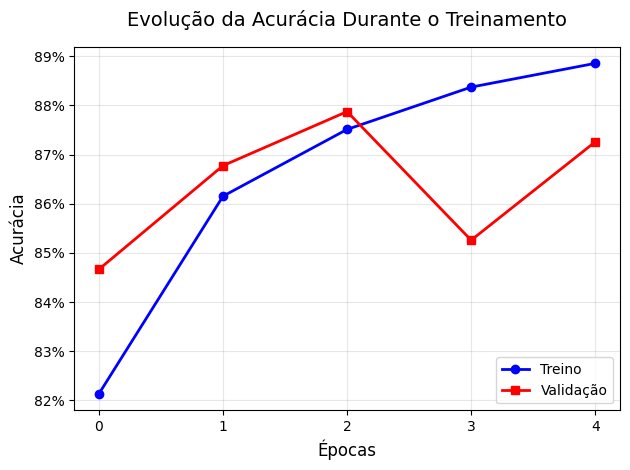

In [31]:
# ============================================
# VISUALIZANDO A EVOLUÇÃO DA APRENDIZAGEM
# ============================================

# historico.history é um DICIONÁRIO que guarda todas as métricas
# do treinamento. É como o "diário de bordo" do modelo.

# 'accuracy' → Acertos nos dados de TREINO (80% dos dados)
# 'val_accuracy' → Acertos nos dados de VALIDAÇÃO (20% separados)

# Gráfico da Acurácia de TREINO
# Mostra como o modelo melhora nos dados que ele VÊ durante o estudo
plt.plot(historico.history['accuracy'],
         label='Treino',        # Nome da linha no gráfico
         color='blue',          # Cor opcional (azul para treino)
         marker='o',            # Marca cada ponto (época)
         linewidth=2)           # Espessura da linha

# Gráfico da Acurácia de VALIDAÇÃO
# Mostra como o modelo melhora nos dados NOVOS (teste surpresa)
plt.plot(historico.history['val_accuracy'],
         label='Validação',     # Nome da linha
         color='red',           # Vermelho para validação
         marker='s',            # Quadrado para diferenciar
         linewidth=2)

# Adiciona a LEGENDA (explica o que cada linha significa)
plt.legend(loc='lower right')  # 'lower right' = canto inferior direito

# Personalizando o gráfico para ficar mais claro
plt.title('Evolução da Acurácia Durante o Treinamento', fontsize=14, pad=15)
plt.xlabel('Épocas', fontsize=12)          # Eixo X: Número de épocas
plt.ylabel('Acurácia', fontsize=12)        # Eixo Y: Porcentagem de acerto
plt.grid(True, alpha=0.3)                  # Grade suave para facilitar leitura
plt.xticks(range(len(historico.history['accuracy'])))  # Marca cada época no eixo X

# Configurar escala do eixo Y para mostrar porcentagem
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Mostra o gráfico
plt.tight_layout()  # Ajusta layout para não cortar textos
plt.show()

## 🧪 Avaliação no Teste

In [33]:

# ============================================
# TESTE FINAL: O MOMENTO DA VERDADE
# ============================================

# evaluate() = Prova FINAL com dados que o modelo NUNCA VIU
# x_test, y_test = 10.000 imagens SEPARADAS desde o início
# (20% dos dados originais, guardados a sete chaves)

loss, acc = modelo.evaluate(x_test, y_test, verbose=0)
#                    ↑           ↑
#               Função de erro  Acurácia

print(f"\n🎯 RESULTADO FINAL NO TESTE:")
print("=" * 40)
print(f"Acurácia no teste: {acc:.2%}")
print(f"Loss (erro) no teste: {loss:.4f}")
print("=" * 40)

# O que isso significa?
# O modelo foi treinado com 48.000 imagens (treino)
# Validado com 12.000 imagens (validação durante treino)
# Agora é testado com 10.000 imagens NOVAS (teste final)



🎯 RESULTADO FINAL NO TESTE:
Acurácia no teste: 86.50%
Loss (erro) no teste: 0.3746
